In [33]:
import datetime
import backtrader as bt
import pandas as pd
import requests as re
import quantstats
import warnings
warnings.filterwarnings("ignore")

## Оптимизация торговой стратегии

In [34]:
"""from strategies import *
cerebro = bt.Cerebro(optreturn=False)
cerebro.adddata(data)
cerebro.addsizer(bt.sizers.SizerFix, stake=3)
cerebro.broker.setcommission(commission=COMMISSIONS)
cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe_ratio')
cerebro.optstrategy(MAcrossover, pfast=range(5, 14), pslow=range(20, 40),pbar=range(5,20))"""

"from strategies import *\ncerebro = bt.Cerebro(optreturn=False)\ncerebro.adddata(data)\ncerebro.addsizer(bt.sizers.SizerFix, stake=3)\ncerebro.broker.setcommission(commission=COMMISSIONS)\ncerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe_ratio')\ncerebro.optstrategy(MAcrossover, pfast=range(5, 14), pslow=range(20, 40),pbar=range(5,20))"

## Подгрузка AlgoPack data в Backtrader

In [35]:
IGNORE_COLUMNS  = ['symbol','datatime','open','high','low','close','vol']
columns = df.columns
LINES = tuple([column for column in columns if not (column in IGNORE_COLUMNS)])
PARAMS = tuple([(value,index) for index , value  in enumerate(columns) if not (value in IGNORE_COLUMNS)])
class GenericCSV_ALGOPACK(bt.feeds.GenericCSVData):
    lines = LINES
    params = PARAMS
    
data = GenericCSV_ALGOPACK(
    timeframe=bt.TimeFrame.Minutes,
    dataname='data/SBER.csv',
    fromdate=datetime.datetime(2023, 1, 1,11,5),
    todate=datetime.datetime(2023, 11, 14,10,5),
    nullvalue=0.0,
    dtformat=('%Y-%m-%d %H:%M:%S'),
    compression=60,
    datetime=0,
    high=3,
    low=4,
    open=2,
    close=5,
    volume=7,
    openinterest=-1
)

"""
Проверка правильности загрузки данных, перед началом работы по созданию стратегий
"""
class PrintClose(bt.Strategy):
    def __init__(self):
        self.dataclose = self.datas[0].close
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.datetime(0).strftime('%Y-%m-%d %H:%M:%S')
        print(f'{dt} {txt}')

    def next(self):
        self.log(f'Clos: {self.dataclose[0]}, Traders: {self.datas[0].trades[0]}, pr_std {self.datas[0].pr_std[0]}')

In [36]:
#Основные параметры
SYMBOL_LOT = 10
ACCOUNT_MONEY = 1000000
COMMISSIONS = 0.00015

In [37]:
#Инициализация тестировщика
from strategies import *
cerebro = bt.Cerebro()
cerebro.adddata(data)
cerebro.addstrategy(LevelStrategy)
cerebro.addsizer(bt.sizers.SizerFix, stake=3*SYMBOL_LOT)
cerebro.broker.setcommission(commission=COMMISSIONS)
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='PyFolio')

In [38]:
#Запуск тестирования
start_portfolio_value = cerebro.broker.getvalue()
results = cerebro.run()
strat = results[0]
end_portfolio_value = cerebro.broker.getvalue()
pnl = end_portfolio_value - start_portfolio_value
print(f'Starting Portfolio Value: {start_portfolio_value:2f}')
print(f'Final Portfolio Value: {end_portfolio_value:2f}')
print(f'PnL: {pnl:.2f}')

2023-01-03 BUY CREATE 141.740000
2023-01-03 BUY EXECUTED, 141.73
2023-02-14 CLOSE CREATE 161.750000
2023-02-14 SELL EXECUTED, 161.75
2023-02-14 SELL CREATE 162.170000
2023-02-14 SELL EXECUTED, 162.17
2023-02-14 CLOSE CREATE 161.990000
2023-02-14 BUY EXECUTED, 162.00
2023-02-14 BUY CREATE 161.880000
2023-02-14 BUY EXECUTED, 161.87
2023-02-15 CLOSE CREATE 159.550000
2023-02-15 SELL EXECUTED, 159.56
2023-02-15 BUY CREATE 160.200000
2023-02-15 BUY EXECUTED, 160.24
2023-02-15 CLOSE CREATE 159.160000
2023-02-15 SELL EXECUTED, 159.14
2023-02-15 SELL CREATE 159.400000
2023-02-15 SELL EXECUTED, 159.42
2023-02-15 CLOSE CREATE 159.870000
2023-02-15 BUY EXECUTED, 159.85
2023-02-15 BUY CREATE 159.890000
2023-02-15 BUY EXECUTED, 159.89
2023-02-15 CLOSE CREATE 159.180000
2023-02-15 SELL EXECUTED, 159.18
2023-02-15 SELL CREATE 159.320000
2023-02-15 SELL EXECUTED, 159.33
2023-02-17 CLOSE CREATE 157.390000
2023-02-17 BUY EXECUTED, 157.36
2023-02-17 BUY CREATE 156.960000
2023-02-17 BUY EXECUTED, 156.97
2

2023-06-20 CLOSE CREATE 241.380000
2023-06-20 SELL EXECUTED, 241.39
2023-06-20 SELL CREATE 241.240000
2023-06-20 SELL EXECUTED, 241.33
2023-06-21 CLOSE CREATE 241.850000
2023-06-21 BUY EXECUTED, 241.87
2023-06-21 SELL CREATE 241.630000
2023-06-21 SELL EXECUTED, 241.63
2023-06-21 CLOSE CREATE 241.870000
2023-06-21 BUY EXECUTED, 241.87
2023-06-21 BUY CREATE 241.950000
2023-06-21 BUY EXECUTED, 241.95
2023-06-22 CLOSE CREATE 241.990000
2023-06-22 SELL EXECUTED, 241.99
2023-06-22 SELL CREATE 242.120000
2023-06-22 SELL EXECUTED, 242.15
2023-06-22 CLOSE CREATE 242.150000
2023-06-22 BUY EXECUTED, 242.15
2023-06-22 BUY CREATE 242.150000
2023-06-22 BUY EXECUTED, 242.15
2023-06-22 CLOSE CREATE 241.670000
2023-06-22 SELL EXECUTED, 241.68
2023-06-22 SELL CREATE 241.840000
2023-06-22 SELL EXECUTED, 241.84
2023-06-22 CLOSE CREATE 242.500000
2023-06-22 BUY EXECUTED, 242.50
2023-06-22 BUY CREATE 242.360000
2023-06-22 BUY EXECUTED, 242.35
2023-06-22 CLOSE CREATE 241.980000
2023-06-22 SELL EXECUTED, 241.

2023-08-14 CLOSE CREATE 264.080000
2023-08-14 SELL EXECUTED, 264.03
2023-08-14 SELL CREATE 263.710000
2023-08-14 SELL EXECUTED, 263.79
2023-08-14 CLOSE CREATE 264.250000
2023-08-14 BUY EXECUTED, 264.26
2023-08-14 BUY CREATE 263.700000
2023-08-14 BUY EXECUTED, 263.76
2023-08-14 CLOSE CREATE 263.730000
2023-08-14 SELL EXECUTED, 263.66
2023-08-14 SELL CREATE 262.800000
2023-08-14 SELL EXECUTED, 262.80
2023-08-15 CLOSE CREATE 258.790000
2023-08-15 BUY EXECUTED, 258.79
2023-08-15 BUY CREATE 260.390000
2023-08-15 BUY EXECUTED, 260.39
2023-08-16 CLOSE CREATE 259.010000
2023-08-16 SELL EXECUTED, 259.03
2023-08-16 SELL CREATE 259.230000
2023-08-16 SELL EXECUTED, 259.23
2023-08-16 CLOSE CREATE 259.850000
2023-08-16 BUY EXECUTED, 259.84
2023-08-16 BUY CREATE 260.210000
2023-08-16 BUY EXECUTED, 260.21
2023-08-16 CLOSE CREATE 259.020000
2023-08-16 SELL EXECUTED, 259.02
2023-08-16 SELL CREATE 259.090000
2023-08-16 SELL EXECUTED, 259.09
2023-08-16 CLOSE CREATE 259.790000
2023-08-16 BUY EXECUTED, 259.

2023-10-02 CLOSE CREATE 258.940000
2023-10-02 SELL EXECUTED, 258.95
2023-10-02 BUY CREATE 259.230000
2023-10-02 BUY EXECUTED, 259.23
2023-10-02 CLOSE CREATE 258.300000
2023-10-02 SELL EXECUTED, 258.30
2023-10-02 SELL CREATE 258.460000
2023-10-02 SELL EXECUTED, 258.46
2023-10-02 CLOSE CREATE 259.300000
2023-10-02 BUY EXECUTED, 259.30
2023-10-02 BUY CREATE 259.480000
2023-10-02 BUY EXECUTED, 259.48
2023-10-02 CLOSE CREATE 258.470000
2023-10-02 SELL EXECUTED, 258.46
2023-10-02 SELL CREATE 258.480000
2023-10-02 SELL EXECUTED, 258.48
2023-10-03 CLOSE CREATE 258.270000
2023-10-03 BUY EXECUTED, 258.28
2023-10-03 BUY CREATE 258.400000
2023-10-03 BUY EXECUTED, 258.41
2023-10-26 CLOSE CREATE 270.200000
2023-10-26 SELL EXECUTED, 270.19
2023-10-26 SELL CREATE 270.050000
2023-10-26 SELL EXECUTED, 270.04
2023-10-27 CLOSE CREATE 271.020000
2023-10-27 BUY EXECUTED, 271.02
2023-10-27 BUY CREATE 270.500000
2023-10-27 BUY EXECUTED, 270.54
2023-10-31 CLOSE CREATE 267.560000
2023-10-31 SELL EXECUTED, 267.5

<IPython.core.display.Javascript object>


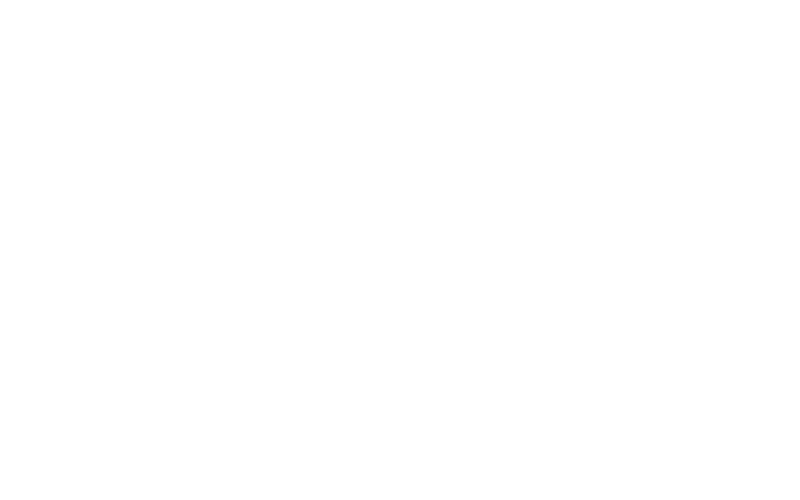

<IPython.core.display.Javascript object>


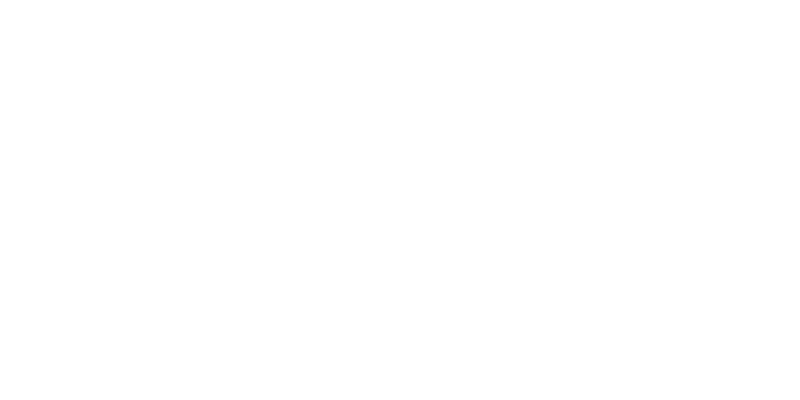

<IPython.core.display.Javascript object>


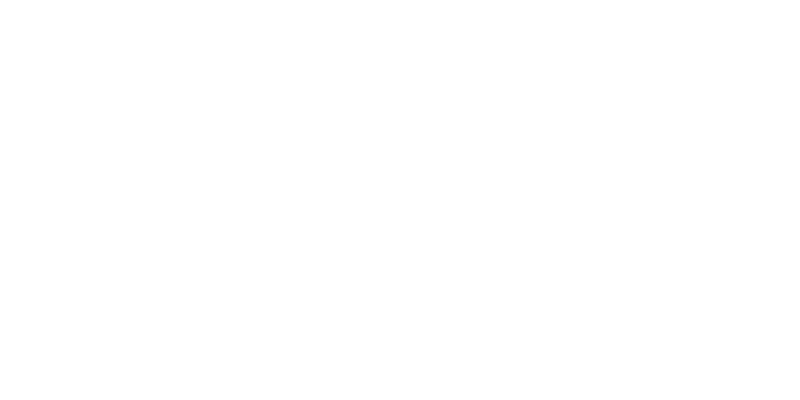

<IPython.core.display.Javascript object>


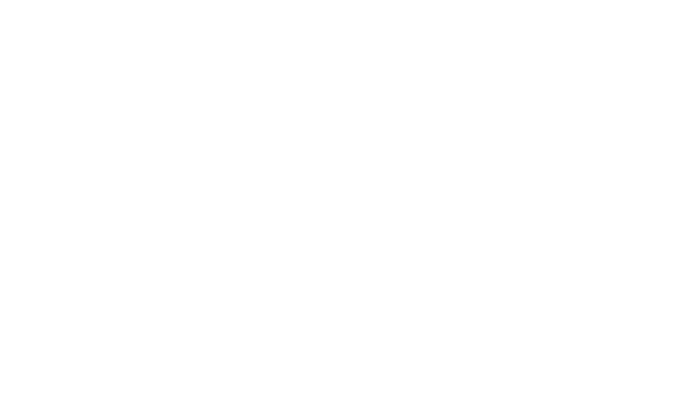

<IPython.core.display.Javascript object>


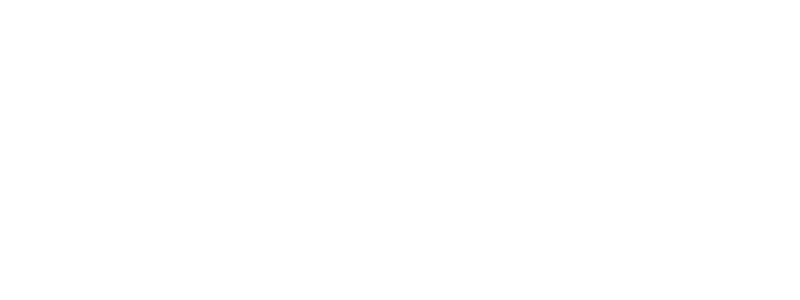

<IPython.core.display.Javascript object>


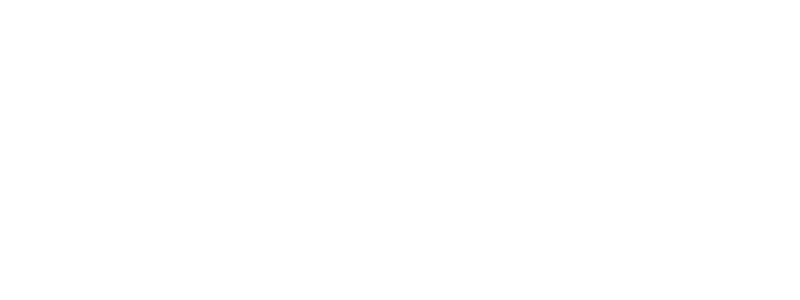

<IPython.core.display.Javascript object>


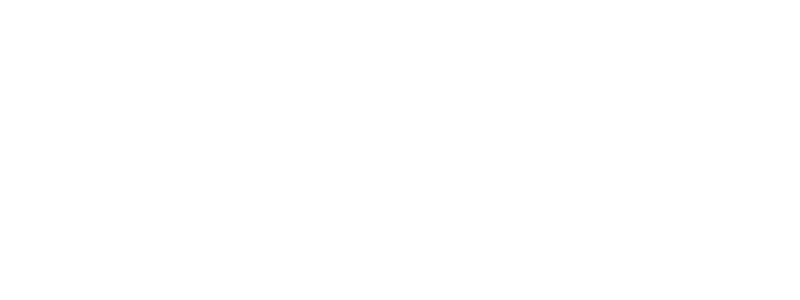

<IPython.core.display.Javascript object>


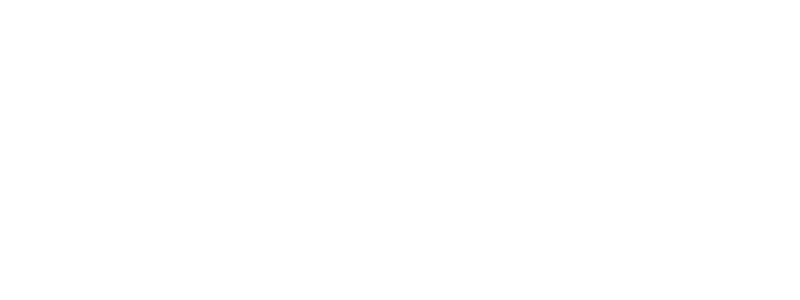

<IPython.core.display.Javascript object>


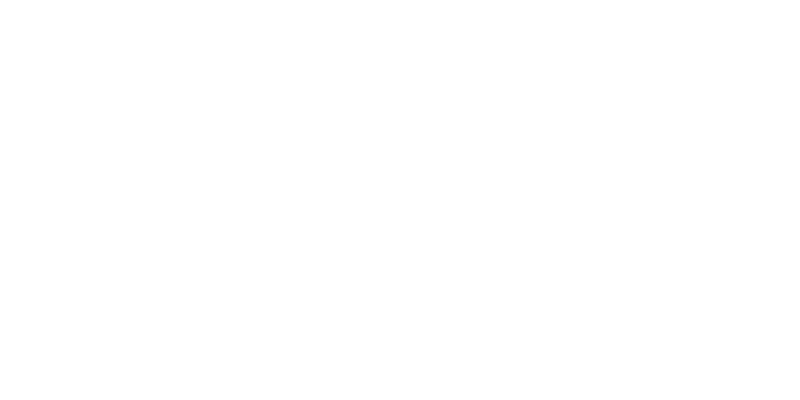

<IPython.core.display.Javascript object>


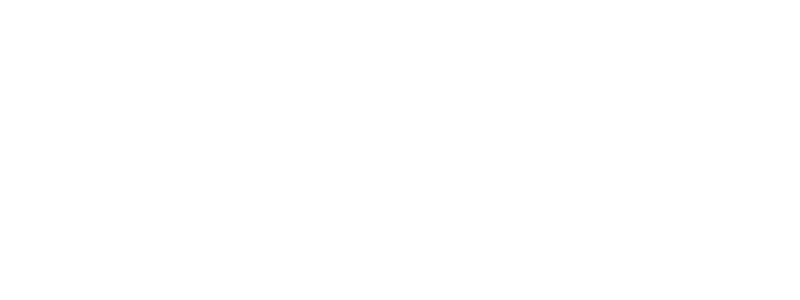

<IPython.core.display.Javascript object>


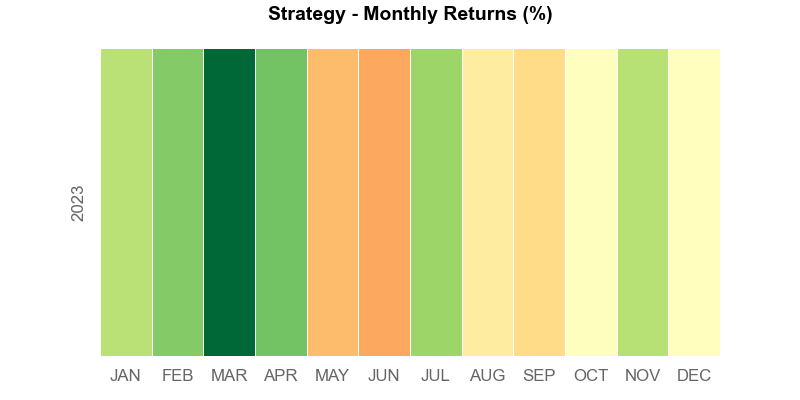

<IPython.core.display.Javascript object>


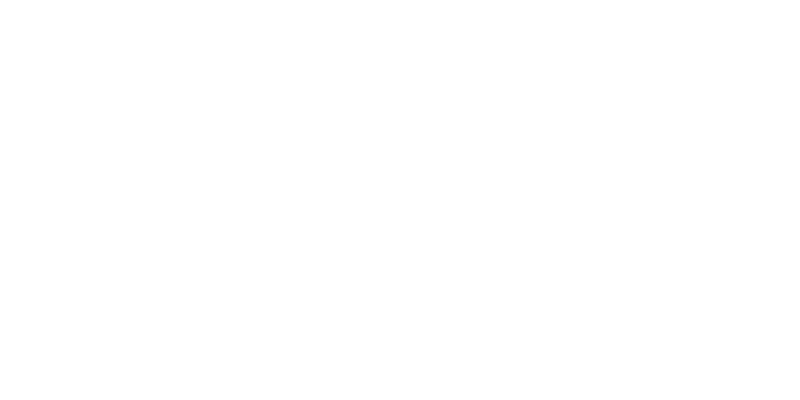

In [31]:
#генерация результатов
portfolio_stats = strat.analyzers.getbyname('PyFolio')
returns, positions, transactions, gross_lev = portfolio_stats.get_pf_items()
returns.index = returns.index.tz_convert(None)
quantstats.reports.html(returns, output='stats_level.html', title='SBER Sentiment')

In [41]:
#визуальное отображение
cerebro.plot()

[[<Figure size 1000x600 with 4 Axes>]]

In [11]:
#Пример оптимизации на основе MA
optimized_runs = cerebro.run()
final_results_list = []
for run in optimized_runs:
    for strategy in run:
        PnL = round(strategy.broker.get_value() - 10000, 2)
        sharpe = strategy.analyzers.sharpe_ratio.get_analysis()
        final_results_list.append(
            [
                strategy.params.pfast,
                strategy.params.pslow,
                strategy.params.pbar,
                PnL,
                sharpe['sharperatio'],
            ]
        )
sort_by_sharpe = sorted(final_results_list, key=lambda x: x[3], reverse=True)
for line in sort_by_sharpe[:5]:
    print(line)


2020-05-12 BUY CREATE 193.860000
2020-05-12 BUY EXECUTED, 193.86
2020-05-12 CLOSE CREATE 193.190000
2020-05-12 SELL EXECUTED, 193.19
2020-05-12 BUY CREATE 193.730000
2020-05-12 BUY EXECUTED, 193.73
2020-05-12 CLOSE CREATE 193.260000
2020-05-12 SELL EXECUTED, 193.24
2020-05-12 SELL CREATE 192.570000
2020-05-12 SELL EXECUTED, 192.57
2020-05-13 CLOSE CREATE 189.160000
2020-05-13 BUY EXECUTED, 189.12
2020-05-15 SELL CREATE 185.700000
2020-05-15 SELL EXECUTED, 185.71
2020-05-18 CLOSE CREATE 186.480000
2020-05-18 BUY EXECUTED, 186.50
2020-05-18 BUY CREATE 188.510000
2020-05-18 BUY EXECUTED, 188.51
2020-05-19 CLOSE CREATE 189.870000
2020-05-19 SELL EXECUTED, 189.87
2020-05-19 BUY CREATE 190.200000
2020-05-19 BUY EXECUTED, 190.20
2020-05-19 CLOSE CREATE 189.840000
2020-05-19 SELL EXECUTED, 189.73
2020-05-20 BUY CREATE 191.440000
2020-05-20 BUY EXECUTED, 191.38
2020-05-21 CLOSE CREATE 191.930000
2020-05-21 SELL EXECUTED, 191.93
2020-05-26 BUY CREATE 194.710000
2020-05-26 BUY EXECUTED, 194.74
20

2020-11-12 CLOSE CREATE 241.380000
2020-11-12 SELL EXECUTED, 241.38
2020-11-13 SELL CREATE 239.730000
2020-11-13 SELL EXECUTED, 239.73
2020-11-13 CLOSE CREATE 240.890000
2020-11-13 BUY EXECUTED, 240.86
2020-11-13 SELL CREATE 240.150000
2020-11-13 SELL EXECUTED, 240.16
2020-11-16 CLOSE CREATE 245.510000
2020-11-16 BUY EXECUTED, 245.51
2020-11-16 BUY CREATE 247.720000
2020-11-16 BUY EXECUTED, 247.73
2020-11-17 CLOSE CREATE 244.720000
2020-11-17 SELL EXECUTED, 244.71
2020-11-17 SELL CREATE 243.470000
2020-11-17 SELL EXECUTED, 243.46
2020-11-17 CLOSE CREATE 244.990000
2020-11-17 BUY EXECUTED, 245.01
2020-11-17 SELL CREATE 244.590000
2020-11-17 SELL EXECUTED, 244.55
2020-11-17 CLOSE CREATE 244.650000
2020-11-17 BUY EXECUTED, 244.64
2020-11-17 SELL CREATE 244.760000
2020-11-17 SELL EXECUTED, 244.73
2020-11-17 CLOSE CREATE 244.650000
2020-11-17 BUY EXECUTED, 244.65
2020-11-19 SELL CREATE 239.080000
2020-11-19 SELL EXECUTED, 239.14
2020-11-19 CLOSE CREATE 240.050000
2020-11-19 BUY EXECUTED, 24

2021-03-18 SELL EXECUTED, 282.69
2021-03-18 CLOSE CREATE 283.170000
2021-03-18 BUY EXECUTED, 283.19
2021-03-19 BUY CREATE 285.540000
2021-03-19 BUY EXECUTED, 285.54
2021-03-23 CLOSE CREATE 284.750000
2021-03-23 SELL EXECUTED, 284.75
2021-03-26 BUY CREATE 291.500000
2021-03-26 BUY EXECUTED, 291.50
2021-04-01 CLOSE CREATE 290.200000
2021-04-01 SELL EXECUTED, 290.30
2021-04-01 SELL CREATE 289.000000
2021-04-02 SELL EXECUTED, 290.81
2021-04-02 CLOSE CREATE 290.850000
2021-04-02 BUY EXECUTED, 290.85
2021-04-05 SELL CREATE 287.200000
2021-04-05 SELL EXECUTED, 287.10
2021-04-05 CLOSE CREATE 288.580000
2021-04-05 BUY EXECUTED, 288.59
2021-04-05 SELL CREATE 288.310000
2021-04-05 SELL EXECUTED, 288.33
2021-04-05 CLOSE CREATE 288.140000
2021-04-05 BUY EXECUTED, 288.22
2021-04-05 SELL CREATE 287.890000
2021-04-05 SELL EXECUTED, 287.83
2021-04-05 CLOSE CREATE 288.350000
2021-04-05 BUY EXECUTED, 288.35
2021-04-06 SELL CREATE 284.400000
2021-04-06 SELL EXECUTED, 284.44
2021-04-08 CLOSE CREATE 285.700

2021-10-06 BUY CREATE 363.860000
2021-10-06 BUY EXECUTED, 363.86
2021-10-06 CLOSE CREATE 363.660000
2021-10-06 SELL EXECUTED, 363.66
2021-10-06 BUY CREATE 365.080000
2021-10-06 BUY EXECUTED, 365.10
2021-10-06 CLOSE CREATE 362.810000
2021-10-06 SELL EXECUTED, 362.92
2021-10-06 SELL CREATE 362.800000
2021-10-06 SELL EXECUTED, 362.81
2021-10-06 CLOSE CREATE 364.850000
2021-10-06 BUY EXECUTED, 364.85
2021-10-07 BUY CREATE 369.850000
2021-10-07 BUY EXECUTED, 369.85
2021-10-07 CLOSE CREATE 367.720000
2021-10-07 SELL EXECUTED, 367.78
2021-10-07 BUY CREATE 368.240000
2021-10-07 BUY EXECUTED, 368.25
2021-10-07 CLOSE CREATE 367.500000
2021-10-07 SELL EXECUTED, 367.50
2021-10-07 BUY CREATE 367.990000
2021-10-07 BUY EXECUTED, 368.05
2021-10-07 CLOSE CREATE 368.280000
2021-10-07 SELL EXECUTED, 368.29
2021-10-11 BUY CREATE 378.960000
2021-10-11 BUY EXECUTED, 378.98
2021-10-12 CLOSE CREATE 383.260000
2021-10-12 SELL EXECUTED, 383.16
2021-10-12 SELL CREATE 380.010000
2021-10-12 SELL EXECUTED, 380.06
2

2021-11-02 Order Canceled/Margin/Rejected
2021-11-02 BUY CREATE 369.850000
2021-11-02 Order Canceled/Margin/Rejected
2021-11-02 BUY CREATE 369.740000
2021-11-02 Order Canceled/Margin/Rejected
2021-11-02 BUY CREATE 369.340000
2021-11-02 Order Canceled/Margin/Rejected
2021-11-02 BUY CREATE 369.810000
2021-11-02 Order Canceled/Margin/Rejected
2021-11-02 BUY CREATE 370.890000
2021-11-02 Order Canceled/Margin/Rejected
2021-11-02 BUY CREATE 370.960000
2021-11-02 Order Canceled/Margin/Rejected
2021-11-02 BUY CREATE 371.210000
2021-11-02 Order Canceled/Margin/Rejected
2021-11-02 BUY CREATE 371.040000
2021-11-02 Order Canceled/Margin/Rejected
2021-11-02 BUY CREATE 371.220000
2021-11-02 Order Canceled/Margin/Rejected
2021-11-02 BUY CREATE 371.080000
2021-11-02 Order Canceled/Margin/Rejected
2021-11-02 BUY CREATE 370.840000
2021-11-02 Order Canceled/Margin/Rejected
2021-11-02 BUY CREATE 370.800000
2021-11-02 Order Canceled/Margin/Rejected
2021-11-02 BUY CREATE 371.750000
2021-11-02 Order Canceled

2022-01-31 SELL EXECUTED, 263.94
2022-01-31 BUY CREATE 264.720000
2022-01-31 BUY EXECUTED, 264.72
2022-01-31 CLOSE CREATE 265.240000
2022-01-31 SELL EXECUTED, 265.22
2022-01-31 BUY CREATE 265.550000
2022-01-31 BUY EXECUTED, 265.56
2022-01-31 CLOSE CREATE 264.930000
2022-01-31 SELL EXECUTED, 264.93
2022-01-31 BUY CREATE 265.050000
2022-01-31 BUY EXECUTED, 265.05
2022-01-31 CLOSE CREATE 264.940000
2022-01-31 SELL EXECUTED, 264.94
2022-01-31 BUY CREATE 266.070000
2022-01-31 BUY EXECUTED, 266.10
2022-02-01 CLOSE CREATE 265.630000
2022-02-01 SELL EXECUTED, 265.60
2022-02-02 SELL CREATE 258.600000
2022-02-02 SELL EXECUTED, 258.76
2022-02-02 CLOSE CREATE 258.870000
2022-02-02 BUY EXECUTED, 258.87
2022-02-03 SELL CREATE 250.820000
2022-02-03 SELL EXECUTED, 250.77
2022-02-03 CLOSE CREATE 251.660000
2022-02-03 BUY EXECUTED, 251.61
2022-02-03 SELL CREATE 250.920000
2022-02-03 SELL EXECUTED, 250.81
2022-02-03 CLOSE CREATE 251.350000
2022-02-03 BUY EXECUTED, 251.34
2022-02-03 SELL CREATE 251.430000

2022-04-27 CLOSE CREATE 121.330000
2022-04-27 BUY EXECUTED, 121.33
2022-04-27 BUY CREATE 128.770000
2022-04-27 BUY EXECUTED, 128.74
2022-04-27 CLOSE CREATE 126.310000
2022-04-27 SELL EXECUTED, 126.35
2022-04-27 BUY CREATE 127.870000
2022-04-27 BUY EXECUTED, 127.90
2022-04-27 CLOSE CREATE 126.970000
2022-04-27 SELL EXECUTED, 127.06
2022-04-27 BUY CREATE 128.690000
2022-04-27 BUY EXECUTED, 128.64
2022-04-28 CLOSE CREATE 131.160000
2022-04-28 SELL EXECUTED, 131.16
2022-04-28 BUY CREATE 133.190000
2022-04-28 BUY EXECUTED, 133.19
2022-04-28 CLOSE CREATE 131.300000
2022-04-28 SELL EXECUTED, 131.30
2022-04-28 SELL CREATE 127.200000
2022-04-28 SELL EXECUTED, 127.18
2022-04-29 CLOSE CREATE 124.240000
2022-04-29 BUY EXECUTED, 124.32
2022-04-29 SELL CREATE 125.150000
2022-04-29 SELL EXECUTED, 125.15
2022-04-29 CLOSE CREATE 125.260000
2022-04-29 BUY EXECUTED, 125.30
2022-04-29 SELL CREATE 123.850000
2022-04-29 SELL EXECUTED, 123.85
2022-04-29 CLOSE CREATE 127.000000
2022-04-29 BUY EXECUTED, 127.00

2022-11-07 BUY CREATE 129.610000
2022-11-07 BUY EXECUTED, 129.66
2022-11-08 CLOSE CREATE 130.430000
2022-11-08 SELL EXECUTED, 130.44
2022-11-10 BUY CREATE 134.500000
2022-11-10 BUY EXECUTED, 134.50
2022-11-15 CLOSE CREATE 137.400000
2022-11-15 SELL EXECUTED, 137.39
2022-11-21 SELL CREATE 133.380000
2022-11-21 SELL EXECUTED, 133.42
2022-11-21 CLOSE CREATE 134.120000
2022-11-21 BUY EXECUTED, 134.13
2022-12-05 BUY CREATE 140.850000
2022-12-05 BUY EXECUTED, 140.86
2022-12-07 CLOSE CREATE 139.200000
2022-12-07 SELL EXECUTED, 139.20
2022-12-20 BUY CREATE 137.220000
2022-12-20 BUY EXECUTED, 137.22
2022-12-21 CLOSE CREATE 137.770000
2022-12-21 SELL EXECUTED, 137.80
2022-12-26 BUY CREATE 140.720000
2022-12-26 BUY EXECUTED, 140.69
2022-12-28 CLOSE CREATE 139.060000
2022-12-28 SELL EXECUTED, 139.09
2023-01-11 BUY CREATE 147.290000
2023-01-11 BUY EXECUTED, 147.29
2023-02-14 CLOSE CREATE 161.750000
2023-02-14 SELL EXECUTED, 161.75
2023-02-15 SELL CREATE 159.440000
2023-02-15 SELL EXECUTED, 159.44
2

AttributeError: 'float' object has no attribute 'broker'

                           Strategy
-------------------------  ----------
Start Period               2023-07-03
End Period                 2023-11-14
Risk-Free Rate             0.0%
Time in Market             99.0%

Cumulative Return          1.74%
CAGR﹪                     3.29%

Sharpe                     0.99
Prob. Sharpe Ratio         72.14%
Smart Sharpe               0.93
Sortino                    1.62
Smart Sortino              1.53
Sortino/√2                 1.15
Smart Sortino/√2           1.08
Omega                      1.19

Max Drawdown               -2.33%
Longest DD Days            105
Volatility (ann.)          5.31%
Calmar                     1.42
Skew                       0.95
Kurtosis                   4.11

Expected Daily %           0.02%
Expected Monthly %         0.35%
Expected Yearly %          1.74%
Kelly Criterion            8.58%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.53%
Expected Shortfall (cVaR)  -0.53%

Max Consecutive Wins       7
Ma

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2023-08-02,2023-09-18,2023-11-14,105,-2.326610,-2.319381
2,2023-07-04,2023-07-06,2023-07-28,25,-0.778153,-0.700589


<IPython.core.display.Javascript object>


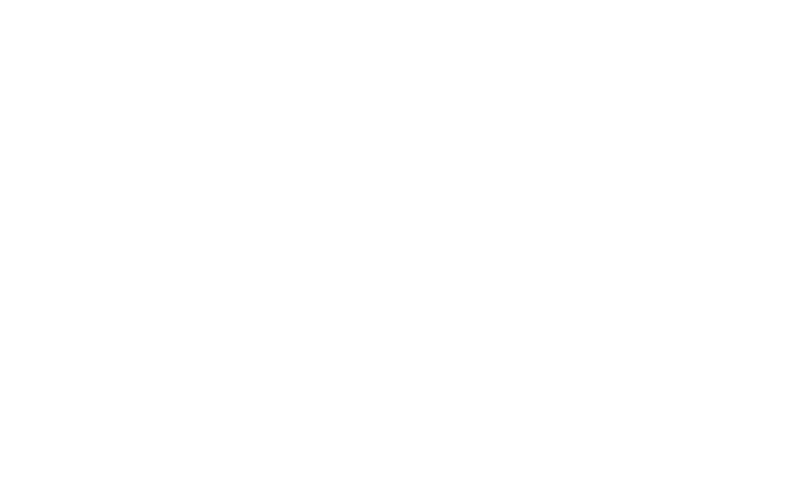

<IPython.core.display.Javascript object>


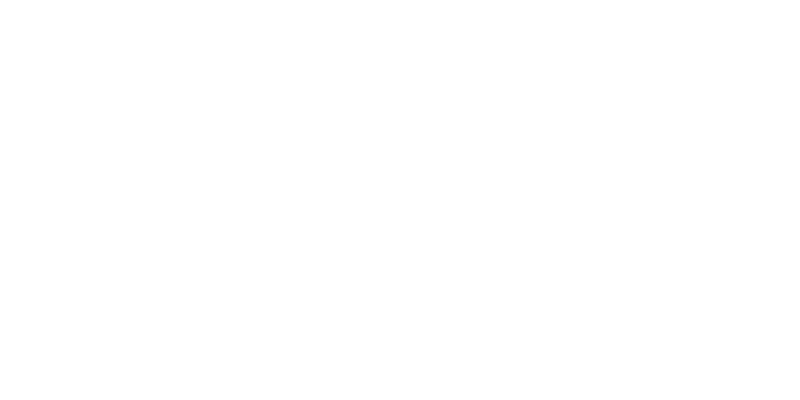

<IPython.core.display.Javascript object>


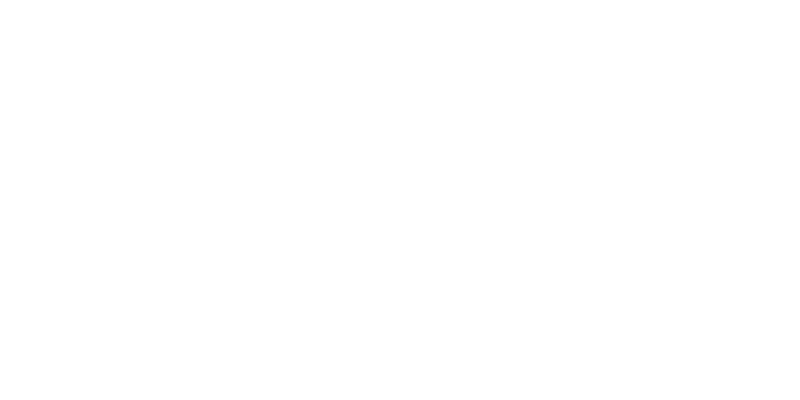

<IPython.core.display.Javascript object>


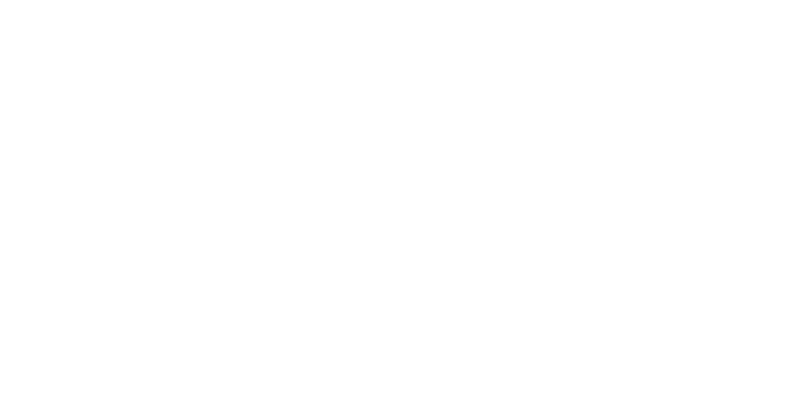

<IPython.core.display.Javascript object>


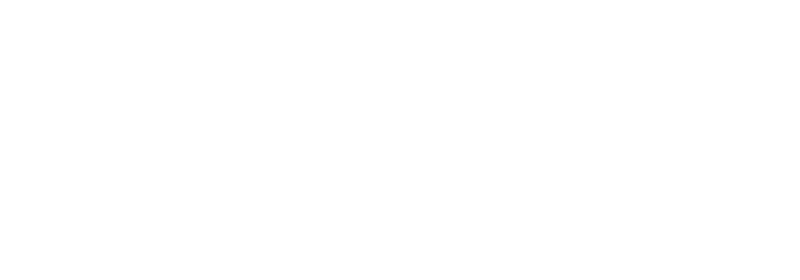

<IPython.core.display.Javascript object>


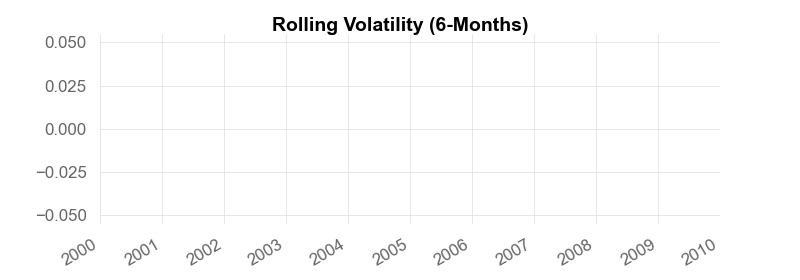

IndexError: index 0 is out of bounds for axis 0 with size 0

In [111]:
#итоговый вывод результатов
quantstats.reports.full(returns)